In [6]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import datapackage
import ome_files
import ome_files.metadata as ofmd

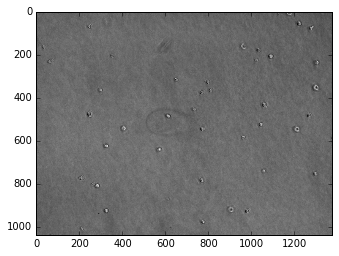

In [7]:
old_cwd = os.getcwd()
os.chdir(os.path.join("UGent", "BaF3"))
reader = ome_files.OMETIFFReader()
reader.set_id("9I5TT808_F00000010.companion.ome")
pixels = reader.open_array(0)
meta = ofmd.OMEXMLMetadata(reader.get_ome_xml())
reader.close()
plt.imshow(pixels, cmap="gray")

In [8]:
cmso_annotations = [_ for _ in meta.get_map_annotations() if _.Namespace == "CMSO/dpkg"]
assert len(cmso_annotations) == 1
ann = cmso_annotations[0]
paths = ann.Value.get("FilePath")
assert len(paths) == 1
datapackage_fn = paths[0]
dp = datapackage.DataPackage(datapackage_fn)
res_map = dict((_.descriptor["name"], _.local_data_path) for _ in dp.resources)
df = pd.read_csv(res_map["objects_table"])
df0 = df[df['time index'] == 0]
df0.head()

,ID of track,time index,cell row,cell col
0,1,0,2.187500,1170.187500
22,2,0,78.603774,1274.867925
56,3,0,367.000000,807.500000
156,8,0,180.561404,1026.035088
242,9,0,525.631579,1040.210526


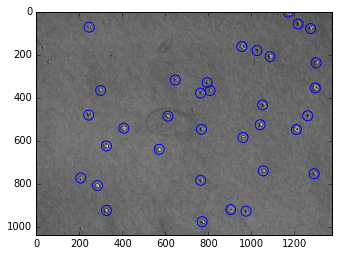

In [9]:
plt.scatter(x=df0['cell col'].values, y=df0['cell row'].values, s=100, edgecolors='b', facecolors='none')
plt.imshow(pixels, cmap="gray")
plt.show()

In [5]:
os.chdir(old_cwd)